# Data Analysis Homework 4
## Summative assessment
### Due date: Monday, November 8th 2021, 2 PM

In [1]:
from __future__ import division
from scipy.stats import norm
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
from scipy.special import erf
from scipy import stats
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Question 1: Linear Regression (10 marks) 
Data collected in an experiment of the photoelectric effect are listed below.

\begin{array}{lcccc}
\hline
{\rm frequency, f/10^{15} Hz} &1.18&0.96&0.82&0.74\\
{\rm energy, E_{k, max}/10^{-19} J} &3.12&1.57&0.8&0.22\\
{\rm error, E_{k, max}/10^{-19} J}   &0.05&0.04&0.11&0.09\\
\hline
\end{array} 



According to Einstein's formulation, the maximum kinetic energy ($E_{k, max}$) of the resulting electrons is related to the frequency  ($f$) of the incoming light as <br>

\begin{equation}
E_{k, max}=hf-W
\end{equation}

where $h$ is Planck's constant and $W$ is the minimum energy required to remove the electrons from the illuminated surface. <br>
(i) Make a plot of the energy versus frequency from the table above, keeping in mind the elements that make a good plot. <br>
(ii) Calculate the slope and intercept of the best-fit straight line to the data, and their associated errors. <br>
(iii) What is the value of Planck's constant and its error you obtain using the data from this experiment?<br>
(iv) Planck's constant is one of the fundamental physical constants and its value is 6.62607015$\times$10$^{-34}$ J Hz$^{-1}$.  Is the value deduced from your linear fit consistent with the expected value? <br>
(v) How would you report the resulting value for $h$?


### (i) Make a plot of the energy versus frequency from the table above, keeping in mind the elements that make a good plot.


In [2]:
# this is the data for this exercise
data = pd.read_csv('speed.csv') #read data
frequency = np.array(data.iloc[:,0])#read data
energy = np.array(data.iloc[:,1])#read data
energy_error = data.iloc[:,2]#read data

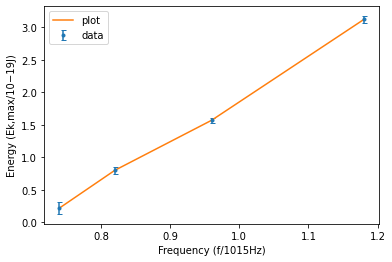

In [3]:
# YOUR CODE HERE

plt.errorbar(frequency,energy, label = 'data', yerr=energy_error,fmt='.',capsize=2.5)#plot error bar of energy
plt.plot(frequency,energy, label = 'plot')#plot between datas
plt.xlabel('Frequency (f/1015Hz)')
plt.ylabel('Energy (Ek,max/10−19J)')
plt.legend()
plt.show()

### (ii) Calculate the slope and intercept of the best-fit straight line to the data, and their associated errors.


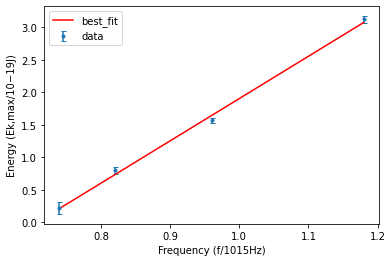

(6.51, 0.3, -4.6, 0.29)


In [4]:
def linear(x,m,c):
    return x*m + c

def one_ii():
    '''Your function should return the gradient,gradient_error,intercept,intercept_error.
    Please make sure that the answer is a list/array of four floats'''
    gradient = 0 #set variable gradient and its error, intercept and its error
    gradient_error = 0
    intercept = 0
    intercept_error = 0
    popt, pcov = curve_fit(linear, frequency, energy, sigma = energy_error) #Using curve fit to find best fit parameter
    perr = np.sqrt(np.diag(pcov)) #Using covariance matrix to find the error
    gradient = popt[0] #gradient,its error, intercept and its error
    gradient_error = perr[0]
    intercept = popt[1]
    intercept_error = perr[1]
    
    plt.errorbar(frequency,energy, label = 'data', yerr=energy_error,fmt='.',capsize=2.5)#plot error bar
    plt.plot(frequency, gradient*frequency+intercept, label='best_fit', color='red')#plot best fit graph
    plt.xlabel('Frequency (f/1015Hz)')
    plt.ylabel('Energy (Ek,max/10−19J)')
    plt.legend()
    plt.show()
    
    return(round(gradient,2),round(gradient_error,2),round(intercept,2),round(intercept_error,2))

print(one_ii())

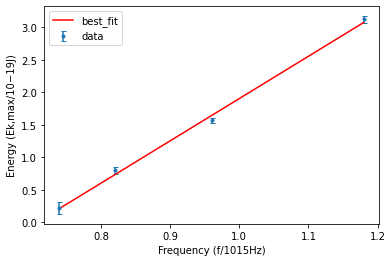

In [5]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert len(one_ii())==4

In [6]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [7]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [8]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) What is the value of Planck's constant and it's error you obtain using the data from this experiment?


According to the original significant figures, Planck's constant, which obtained by data is 6.51$\times$10$^{-34}$ J Hz$^{-1}$. and its error of 0.30.

### (iv) Planck's constant is one of the fundamental physical constants and its value is 6.62607015$\times$10$^{-34}$ J Hz$^{-1}$.  Is the value deduced from your linear fit consistent with the expected value?

The difference between Planck's constant, which I obtained from data and the fundamental value, is roughly 0.12, and this value is under the error of 0.15, which find from the data that in plus part.
So, the value can deduce from the linear fit.

### (v) How would you report the resulting value for $h$?

According to the data h will be reported to $6.51 \pm 0.15 \times 10^{-34}JHz^{-1}$

## Question 2: Pixels in an image (10 marks + 2 bonus)

An astronomer just received a new image from a telescope. The image has 2048 $\times$ 2048 pixels, with a mean  background count of $\bar N = $50. Upon looking at the image, the astronomer sees that there is one pixel which has a value of 86 counts, so it is brighter than the mean pixel value.
In this exercise you will have to determine the significance of the signal in this pixel: is it real, or should the astronomer discard it as a fluke signal? 

> (i)  How many pixels, $N$, are there in the image?  
<bf>
> (ii) What is the standard deviation of the background? (Hint: assume a Poisson distribution).<br>
<bf>
> (iii) Plot the the distribution of the background pixel values of the image using a histogram. When plotting the histogram, keep in mind the elements that make a good plot.<br>
(iv) Determine how many standard deviations the bright pixel is from the mean, and use vertical lines to clearly indicate the location of the 1$\sigma$, 2$\sigma$ and 3$\sigma$ intervals on your histogram. <br>
(v) Remember the "5$\sigma$ level of certainty" discussed in Lecture 1: for a normal distribution, the probability of finding a data point above 5$\sigma$ is about about 1 in 3.5 million, i.e. $\sim 3\times 10^{-7}$. Why can you use the confidence limits for a normal distribution here, despite the fact that you are looking at a Poisson distribution? Is this pixel compatible with a 5$\sigma$ detection, i.e., is the pixel significant? <br>
(vi) Given the number of pixels in the image, calculate how many pixels you would expect above 5$\sigma$.<br>
Based on the result, reconsider the significance of the bright pixel.<br>
Bonus: The astronomer gets an image from a different telescope, where the instrument only has 400$\times$400 pixels. How would your answer change, if all other parameters are the same as above?    

### (i) How many pixels, $N$, are there in the image?


In [9]:
def two_i():
    '''Your function should return the number of pixels in the image.'''
    npixels=(2048*2048) #number of pixels
    return npixels

print(two_i())

4194304


In [10]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) What is the standard deviation of the background? (Hint: assume a Poisson distribution)

In [11]:
def two_ii():
    '''Your function should return the standard deviation of the background'''
    mean = 50    
    stdev=np.sqrt(50) #standard deviation from the mean
    return stdev

print(two_ii())

7.0710678118654755


In [12]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) Plot the the distribution of the background pixel values of the image using a histogram. When plotting the histogram, keep in mind the elements that make a good plot.

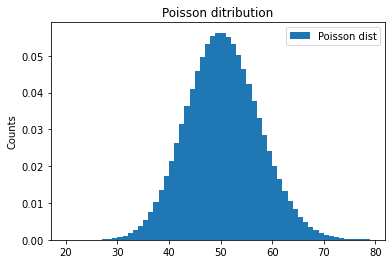

In [13]:
fig, ax1 = plt.subplots()

poisson_data = np.random.poisson(lam=50,size=two_i()) # using poisson ditribution set the data
color = 'tab:blue'
ax1.hist(poisson_data,label='Poisson dist', density=True, bins = np.arange(20,80), color=color) #Plot Poisson with histogram
ax1.set_ylabel('Poisson units')
ax1.set_title('Poisson ditribution')
ax1.set_ylabel('Counts')
ax1.set_ylim(0)
ax1.legend()

### (iv) i. Determine how many standard deviations the bright pixel is from the mean.

In [14]:
def two_iv():
    '''Your function should return the number of standard deviations the birght pixel is from the mean'''
    bright=86 #bright value
    mean=50 #mean
    std=two_ii() #standard deviation
    n_stdev=(bright-mean)/std #standard deviation of bright pixel
    return n_stdev

print(two_iv())

5.091168824543142


In [15]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert two_iv() > 1

### (iv) ii. Update your plot using vertical lines to clearly indicate the location of the 1 𝜎 , 2 𝜎  and 3 𝜎  intervals on your histogram.

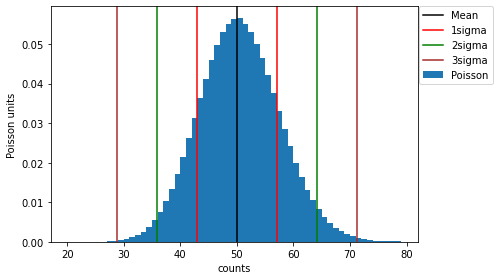

In [16]:
mean=50
std=two_ii()
fig, ax1 = plt.subplots()

poisson_data = np.random.poisson(lam=50,size=two_i())
color = 'tab:blue'
ax1.hist(poisson_data, density=True, bins = np.arange(20,80), label = 'Poisson', color=color)
ax1.set_ylabel('Poisson units')
ax1.set_xlabel('counts')
ax1.set_ylim(0)
ax1.axvline(x=mean, ymin=0, ymax=1,label='Mean', color='black') #mean value
ax1.axvline(x=mean+std, ymin=0, ymax=1,label='1sigma', color='red') # 1 sigma both side
ax1.axvline(x=mean-std, ymin=0, ymax=1, color='red')
ax1.axvline(x=mean+2*std, ymin=0, ymax=1,label='2sigma', color='green')# 2 sigma both side
ax1.axvline(x=mean-2*std, ymin=0, ymax=1, color='green')
ax1.axvline(x=mean+3*std, ymin=0, ymax=1,label='3sigma', color='brown')# 3 sigma both side
ax1.axvline(x=mean-3*std, ymin=0, ymax=1, color='brown')

fig.legend(bbox_to_anchor=(0.76, 0.4, 0.4, 0.58))
fig.tight_layout()

### (v) Remember the "5$\sigma$ level of certainty" discussed in Lecture 1: for a normal distribution, the probability of finding a data point above 5$\sigma$ is about about 1 in 3.5 million, i.e. $\sim 3\times 10^{-7}$. Why can you use the confidence limits for a normal distribution here, despite the fact that you are looking at a Poisson distribution? Is this pixel compatible with a 5$\sigma$ detection, i.e., is the pixel significant?

Because of The central limit theorem, the sum of a large number of independent random variables, each with finite mean and variance, will tend to be normally distributed, irrespective of the distribution function of the random variable.
So, the pixels in the image are a pretty large number of random variables, which makes Possion distribution compatible with normal distribution, and the pixel is not so significant according to the probability of five sigmas.

### (vi) i. Given the number of pixels in the image, calculate how many pixels you would expect above 5$\sigma$. 

In [17]:
def two_vi():
    '''your function should return the number of pixels above 5 sigma for this distribution'''
    mean=50
    std=two_ii()
    
    x_1 = ((mean+(5*std))-mean)/((np.sqrt(2)*std)) #Return the fraction of measurements outside the range
    x_2 = ((mean-(5*std))-mean)/((np.sqrt(2)*std))
    probability = (1-((0.5*(1+erf(x_1)))-(0.5*(1+erf(x_2)))))
    n_above=int(two_i()*probability)/2 #it exist both side so to find bright one it divided by 2
    return n_above
print(two_vi()) 

1.0


In [18]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (vi) ii. Based on the result, reconsider the significance of the bright pixel.

In normally distributed data, there is approximately a $5.73\times 10^{-5}%$ chance of finding data five standard deviations away from the mean. Thus, when collecting 4,194,304 pixels, it will likely see about 2~3 (actual value was approximately 2.4) bright pixels at the five sigma level. This does not necessarily mean that it has discovered bright pixels. Rather it may mean that it has randomly happened upon a image.

### Bonus: The astronomer gets an image from a different telescope, where the instrument only has 400$\times$400 pixels. How would your answer change, if all other parameters are the same as above?  

A number of pixels in an image are changed, but the mean value and other parameters are not changed. But if you want to find over the five sigmas like upper questions, it could not be found. Because base number of pixels are not enough to get the pixel of five sigmas.

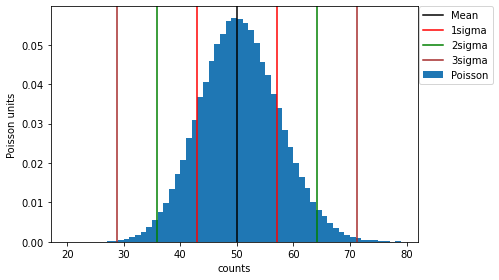

In [19]:
# write any supporting code for your bonus answer here
mean=50
std=two_ii()
fig, ax1 = plt.subplots()

poisson_data = np.random.poisson(lam=50,size=400*400) #same poisson distribution but different size
color = 'tab:blue'
ax1.hist(poisson_data, density=True, bins = np.arange(20,80), label = 'Poisson', color=color)
ax1.set_ylabel('Poisson units')
ax1.set_xlabel('counts')
ax1.set_ylim(0)
ax1.axvline(x=mean, ymin=0, ymax=1,label='Mean', color='black')
ax1.axvline(x=mean+std, ymin=0, ymax=1,label='1sigma', color='red')
ax1.axvline(x=mean-std, ymin=0, ymax=1, color='red')
ax1.axvline(x=mean+2*std, ymin=0, ymax=1,label='2sigma', color='green')
ax1.axvline(x=mean-2*std, ymin=0, ymax=1, color='green')
ax1.axvline(x=mean+3*std, ymin=0, ymax=1,label='3sigma', color='brown')
ax1.axvline(x=mean-3*std, ymin=0, ymax=1, color='brown')

fig.legend(bbox_to_anchor=(0.76, 0.4, 0.4, 0.58))
fig.tight_layout()

## Question 3: $\chi^2$ minimisation (10 marks + 2 bonus)

Some students take a spectrum of an M dwarf star. The spectra of such stars show hydrogen emission from the Balmer series, the most prominent emission line being the H$\alpha$ line at about 6562.8 <span>&#8491;</span>.
The data is coming from a csv file with three (comma-separated) columns, the first one corresponds to the wavelength (in Angstrom, <span>&#8491;</span>), the second corresponds to the measured flux (in units of 10$^{-14}$ erg cm$^{-1}$ s$^{-2}$ <span>&#8491;</span>$^{-1}$), and the third is the flux error.

(i) Plot the spectrum i.e., make a plot of the flux versus the wavelength.<br>
(ii) Perform a $\chi^2$ minimisation using a Gaussian model for the H$\alpha$ emission line. What are the best-fit parameters, and the value of $\chi^2_{min}$?<br>
(iii) What is the value of $\chi^2_{\rm \nu}$?<br>
(iv) What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?<br>
(v) Plot the best fit Gaussian model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.<br>
(vi) Repeat steps (ii)-(v) but using a Voigt model instead of a Gaussian.<br>
(vii) Finally, comment on the differences between the two fits.<br>
Bonus: What could you do to further improve the fit?



### (i) Plot the spectrum i.e., make a plot of the flux versus the wavelength.

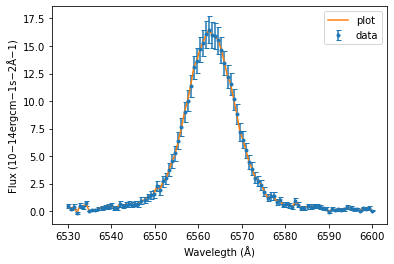

In [20]:
data = pd.read_csv('ha_line.csv') #read datas
Wavelength = data.iloc[:,0]
Flux = data.iloc[:,1]
Flux_errors = data.iloc[:,2]
plt.errorbar(Wavelength,Flux, label = 'data', yerr=Flux_errors,fmt='.',capsize=2.5)# plot error bars
plt.plot(Wavelength,Flux, label = 'plot') #plot Flux-Wavelength graph
plt.xlabel('Wavelegth (Å)')
plt.ylabel('Flux (10−14ergcm−1s−2Å−1)')
plt.legend()
plt.show()

### (ii) Perform a $\chi^2$ minimisation using a Gaussian model for the H$\alpha$ emission line. What are the best-fit parameters (amplitude, mean, and standard deviation), and the value of $\chi^2_{min}$?


In [21]:
'''write the code to calculate chi-square for the given Gaussian model'''

def gaussian(Wavelength, amplitude, mean, stdev):
    return amplitude*np.exp(-(((Wavelength-mean)**2)/(2*(stdev**2))))

def chisqfunc_gauss(parameters):
    '''Gaussian chi-square'''
    Wavelength, amp, mean, std = parameters
    chisq=sum((Flux-gaussian(Wavelength,amp,mean,std))**2/Flux_errors**2) #definition of Chi-Square with Gaussian function
    return chisq

In [22]:
'''write a function called three_ii which performs a chi-square minimisation based on the chisqfunc_gauss function 
from the previous step. The function should return an array containing the best fit Gaussian amplitude, 
mean, and standard deviation, as well as the minimsed chi-square'''

def three_ii():
    '''Please make sure that the answer is a list/array of the type [[best_fit_parameters_gauss], min_chisq_gauss]'''
    initial_guess = [15,6560,10] #set the initial value

    popt, pcov = curve_fit(gaussian, Wavelength,Flux, p0=initial_guess, sigma=Flux_errors) #Using curve fit to find best fit parameters
    amp=popt[0] #parameters come from curve fit
    mean=popt[1]
    std=popt[2]
    covariance_matrix=pcov #coveriance matrix
    best_fit_parameters_gauss=[amp,mean,std] #set best fit parameter
    parameters=[Wavelength, amp,mean,std]
    min_chisq_gauss=chisqfunc_gauss(parameters)  #Chi-square
    
    up=[]
    down=[]
    for i in range(len(Flux)-1): #Sum of squared lagged residuals
        up.append(((Flux[i+1]-gaussian(Wavelength[i+1],amp,mean,std))-(Flux[i]-gaussian(Wavelength[i+1],amp,mean,std)))**2)
    for i in range(len(Flux)):  #sum of residuals
        down.append((Flux[i]-gaussian(Wavelength[i],amp,mean,std))**2)
    Durbin_Watson=sum(up)/sum(down) #Durbin Watson statistic to find correlation

    return best_fit_parameters_gauss, min_chisq_gauss
    
print(three_ii())

([15.022461570034178, 6562.852780607729, 6.12215135030184], 212.14918782929408)


In [23]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert len(three_ii()[0]) == 3

In [24]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) What is the value of $\chi^2_{\rm \nu}$?

In [25]:
def three_iii():
    '''your function should return the value of the reduced chi-square'''
    dof=len(Flux)-3
    chisq_red_gauss=three_ii()[1]/dof #Definition of reduced Chi-Square
    return chisq_red_gauss

print(three_iii())

2.1871050291679803


In [26]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iv) What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?

In [27]:
def three_iv():
    '''your function should return the probability of obtaining the value of chi-square minimum obtained from above'''
    dof=len(Flux)-3 # Degree of Freedom (3 parameters)
    def factorial(n): #definition of factorial
        if n < 2:
            return 1
        else:
            return n * factorial(n-1)
    def prob(x): #Definition of Chi-sqare probability ditribution function
        return ((x**(dof/2-1)*np.exp(-x/2))/(2**(dof/2)*factorial(dof/2)))
    
    probability_gauss=1-stats.chi2.cdf(three_ii()[1],dof) #probability with Chi-Square cumulative ditribution function
    return probability_gauss

print(three_iv())

1.4093937128478728e-10


In [28]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert three_iv() > 0

### (v) Plot the best fit Gaussian model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.

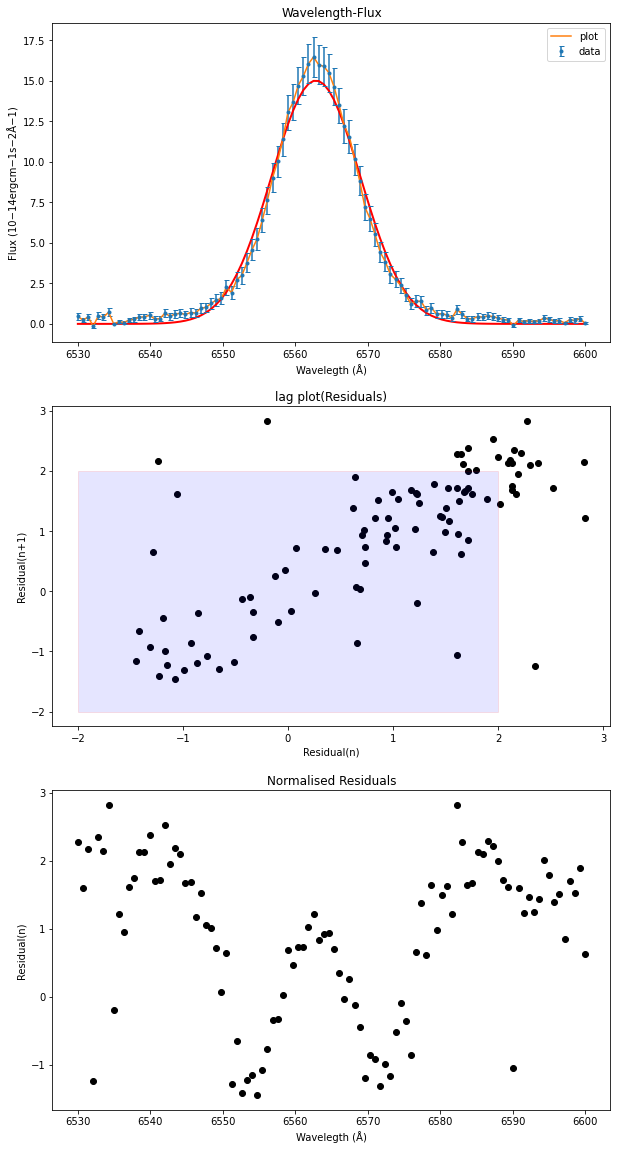

In [29]:
from matplotlib.patches import Rectangle #for the check Lag plot
amp=three_ii()[0][0] #best fit parameters
mean=three_ii()[0][1]
std=three_ii()[0][2]

fig, ax = plt.subplots(3, 1, figsize=(10,20))
Resi=(Flux-gaussian(Wavelength,amp,mean,std))/Flux_errors #Normalised residuals in weighted
Resi1=list(Resi)
Resi2=list(Resi)
Resi1.remove(Resi1[0]) #lagged residuals
Resi2.remove(Resi2[99])

ax[0].plot(Wavelength, gaussian(Wavelength,amp,mean,std), color='red', linewidth=2) #Best fit curve in Gaussian
ax[1].scatter(Resi1, Resi2, color='black') #lagged residual
ax[2].scatter(Wavelength, Resi, color='black')#Normalised residual
ax[0].errorbar(Wavelength,Flux, label= 'data', yerr=Flux_errors,fmt='.',capsize=2.5)#plot error bar
ax[0].plot(Wavelength,Flux, label = 'plot')
ax[0].set_xlabel('Wavelegth (Å)')
ax[0].set_ylabel('Flux (10−14ergcm−1s−2Å−1)')
ax[1].set_xlabel('Residual(n)')
ax[1].set_ylabel('Residual(n+1)')
ax[1].add_patch(Rectangle((-2,-2),4,4,fc='blue',ec='red',alpha=0.1)) #check the +_2 range
ax[2].set_xlabel('Wavelegth (Å)')
ax[2].set_ylabel('Residual(n)')
ax[0].set_title('Wavelength-Flux')
ax[1].set_title('lag plot(Residuals)')
ax[2].set_title('Normalised Residuals')
ax[0].legend()
plt.show()

In the graph 1, best_fit graph looks nice. But from the Lag plot in graph 2, 91percent of residuals are not in the square $\pm2$. Also Normalised residual in graph 3, residuals are not randomly spread it consist some shape. And the probability of chi-square is almost 1.
According to the these results, best fit parameters which is supported by gaussian function is not good fit.

### (vi) Repeat steps (ii)-(v) but using a Voigt model instead of a Gaussian.

### (vi) i. Perform a $\chi^2$ minimisation using a Voigt model for the H$\alpha$ emission line. What are the best-fit parameters (amplitude, center, sigma, and gamma), and the value of $\chi^2_{min}$?

In [30]:
from scipy.special import wofz #this is needed to define the Voigt profile

'''write the code to calculate chi-square for the given Voigt profile'''

data = pd.read_csv('ha_line.csv')
Wavelength = data.iloc[:,0]
Flux = data.iloc[:,1]
Flux_errors = data.iloc[:,2]

def voigt(Wavelength, amplitude, center, sigma, gamma):
    peak = amplitude*(sigma*np.sqrt(2*np.pi))
    return peak*np.real(wofz(((Wavelength-center) + 1j*gamma)/sigma/np.sqrt(2))) / sigma/np.sqrt(2*np.pi)
        
def chisqfunc_voigt(parameters):
    '''Voigt chi-square'''
    Wavelength, amp, cent, sig, gam = parameters
    chisq=sum((Flux-voigt(Wavelength,amp,cent,sig,gam))**2/Flux_errors**2) #Definition of Chi-square in Voigt

    return chisq




In [31]:
'''write a function called three_vi_i which performs a chi-square minimisation based on the chisqfunc_voigt function 
from the previous step, and returns an array containing the best fit Voigt amplitude, center, sigma, and gamma, 
as well as the minimsed chi-square'''

def three_vi_i():
    '''Please make sure that the answer is a list/array of the type [[best_fit_parameters_voigt], min_chisq_voigt]'''
    initial_guess = [17,6565,100,5] #initial values
    popt, pcov = curve_fit(voigt, Wavelength,Flux, p0=initial_guess, sigma=Flux_errors)# using curve fit function for best fit parameters
    amp=popt[0] #best fit parameters
    cent=popt[1]
    sig=popt[2]
    gam=popt[3]
    covariance_matrix=pcov#coveriance matrix
    best_fit_parameters_voigt=[amp,cent,sig,gam] #best fit parameters
    parameters=[Wavelength, amp, cent, sig, gam]
    min_chisq_voigt=chisqfunc_voigt(parameters)
    
    up=[]
    down=[]
    for i in range(len(Flux)-1): #Durbin Watson for check correlation
        up.append(((Flux[i+1]-voigt(Wavelength[i+1],amp,cent,sig,gam))-(Flux[i]-voigt(Wavelength[i+1],amp,cent,sig,gam)))**2)
    for i in range(len(Flux)):
        down.append((Flux[i]-voigt(Wavelength[i],amp,cent,sig,gam))**2)
    Durbin_Watson=sum(up)/sum(down)
    #print(Durbin_Watson)

    return best_fit_parameters_voigt, min_chisq_voigt

print(three_vi_i())

([17.655599792242864, 6562.885840229928, -5.391053381096836, -0.826122858806446], 148.81282865454352)


In [32]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert len(three_vi_i()[0]) == 4

In [33]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (vi) ii. What is the value of $\chi^2_{\rm \nu}$?

In [34]:
def three_vi_ii():
    '''your function should return the value of the reduced chi-square'''
    dof=len(Flux)-4 #Degree of freedom (4 parameters)
    chisq_red_voigt=three_vi_i()[1]/dof #Definition of reduced Chi-square
    return chisq_red_voigt

print(three_vi_ii())

1.5501336318181618


In [35]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (vi) iii. What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?


In [36]:
def three_vi_iii():
    '''your function should return the probability of obtaining the value of chi-square minimum obtained from above'''
    dof=len(Flux)-4.#Degree of freedom
    def factorial(n):#Factorial for calculate
        if n < 2:
            return 1
        else:
            return n * factorial(n-1)
    def prob(x): #Chi-square probability distribution function
        return ((x**(dof/2-1)*np.exp(-x/2))/(2**(dof/2)*factorial(dof/2)))

    probability_voigt=1-stats.chi2.cdf(three_vi_i()[1],dof) #with Chi-sqare cumulative distribution function calculate the probability
    return probability_voigt

print(three_vi_iii())

0.00044651491291269885


In [37]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert three_vi_iii() > 0

### (vi) iv. Plot the best fit Voigt model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.

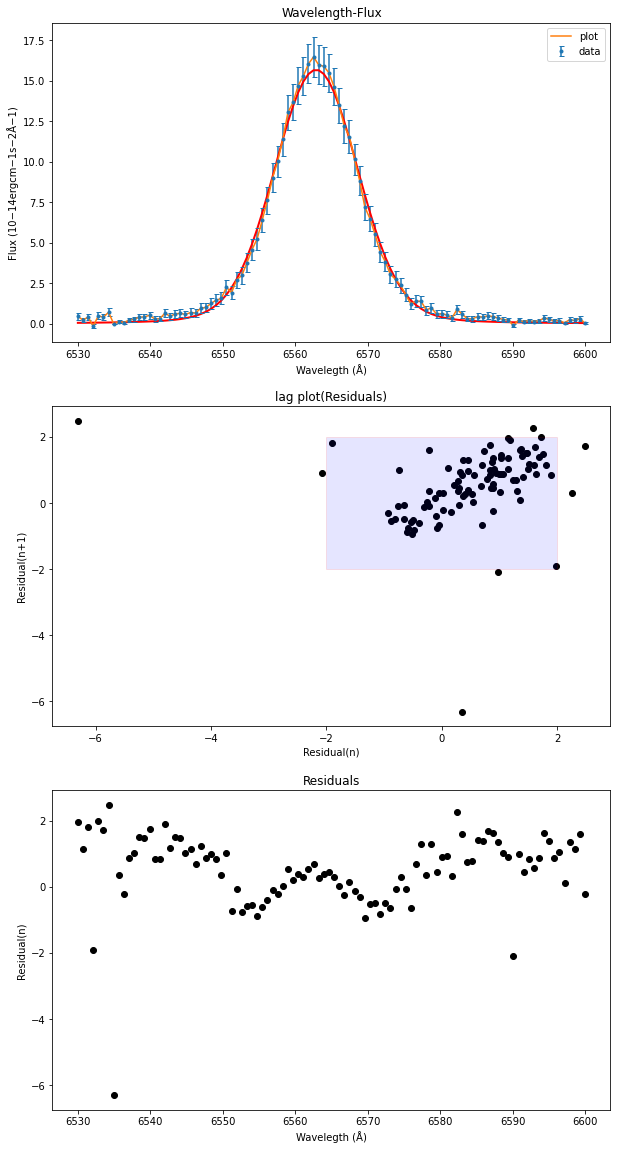

In [38]:
amp=three_vi_i()[0][0] #best fit parameters
cent=three_vi_i()[0][1]
sig=three_vi_i()[0][2]
gam=three_vi_i()[0][3]

fig, ax = plt.subplots(3, 1, figsize=(10,20))
Resi=(Flux-voigt(Wavelength,amp,cent,sig,gam))/Flux_errors#Normalised residuals
Resi1=list(Resi)
Resi2=list(Resi)
Resi1.remove(Resi1[0])#lagged residuals
Resi2.remove(Resi2[99])

ax[0].plot(Wavelength, voigt(Wavelength,amp,cent,sig,gam), color='red', linewidth=2)#best fit curve graph
ax[1].scatter(Resi1, Resi2, color='black') #Lagged residual plot
ax[2].scatter(Wavelength, Resi, color='black') #Normalised residual plot
ax[0].errorbar(Wavelength,Flux, label = 'data', yerr=Flux_errors,fmt='.',capsize=2.5)#error bars
ax[0].plot(Wavelength,Flux, label = 'plot')
ax[0].set_xlabel('Wavelegth (Å)')
ax[0].set_ylabel('Flux (10−14ergcm−1s−2Å−1)')
ax[1].set_xlabel('Residual(n)')
ax[1].set_ylabel('Residual(n+1)')
ax[1].add_patch(Rectangle((-2,-2),4,4,fc='blue',ec='red',alpha=0.1)) #To find +_2 range easily
ax[2].set_xlabel('Wavelegth (Å)')
ax[2].set_ylabel('Residual(n)')
ax[0].set_title('Wavelength-Flux')
ax[1].set_title('lag plot(Residuals)')
ax[2].set_title('Residuals')
ax[0].legend()
plt.show()

### (vii) Finally, comment on the differences between the two fits.

In the residual graphs, using the Voigt function is more accurate than the Gaussian function. Not like Gaussian, Voigt function lag plot seems like clustering about 90% of residuals in the $\pm$2. And Normalised Residuals graph of the Voigt also represents scatter within $\pm$2, but many of the gaussian's normalised residuals over +2. Probability of chi-square also slightly closer to 0.5 than Gaussian.
As a result, the Voigt function could make the best fit parameter more closely than the Gaussian function. the value of Chi-square also defines that Voigt is better.
However, the probability of Voigt and shape of Normalised residual also make Voigt is not the best fit parameters.

### Bonus: What could you do to improve the fit? You can either write an answer into the markdown cell below, or you could add some code to demonstrate what you could do, or both.

1. Use iterative approaches. The goodness-of-fit parameter is minimised by changing each parameter in turn, based on input step sizes. So one parameter changed gradually, and other parameters kept the same. But it is the inefficient method that changes all parameters simultaneously, with vector directed towards minimum.
2. Use second-Order expansion, like Taylor expansion of Chi-Square about a set of parameters, the second-order expansion parameters about the minimum.
3. Use other functions. If I choose the other base function of the best fit parameter, it could be better. The Gaussian is the exponential function, and Voigt is also consist of the exponential function. The normalised residual graph usually had bump data at about 6535, 6565, 6585 wavelengths.
4. Change initial values
5. If the data set is sufficiently large, use Benford's Law to check it is valid

In [39]:
def mine(x,a,b,c,d):
    return a*np.exp(x**b)+c*x+d #example of function

def chisqfunc_mine(parameters): #chi-square of function
    Wavelength, a, b, c, d = parameters
    chisq=sum((Flux-mine(Wavelength,a,b,c,d))**2/Flux_errors**2)

    return chisq
def value(): #find best fit parameters
    initial_guess = [17,6565,100,5]
    popt, pcov = curve_fit(mine, Wavelength,Flux, p0=initial_guess, sigma=Flux_errors)
    a=popt[0]
    b=popt[1]
    c=popt[2]
    d=popt[3]
    covariance_matrix=pcov
    best_fit_parameters_mine=[a,b,c,d]
    parameters=[Wavelength, a, b, c, d]
    min_chisq_mine=chisqfunc_mine(parameters)
    
    return best_fit_parameters_mine, min_chisq_mine




## Question 4: Particle growth (10 marks)

In this question we shall analyse data from an experiment measuring the aggregation of particles in a solution.

\begin{array}{lcc}
\hline
{\rm time~(s)} & {\rm size~(nm)} & {\rm error~(nm)}\\
0.13 & 117 & 30\\
0.17 & 128 & 11\\
0.44 & 200 & 20\\
0.87 & 331 & 15\\
2.10 & 514 & 30\\
6.03 & 887 & 40\\
17.96 & 1703 & 40\\
42.01 & 2598 & 43\\
\hline
\end{array} 

The experiment involves measuring the growth of the particles as a function of time described by the equation $r = r_{0}t^{n}$.


The model to describe the data has two parameters: an initial particle size $r_{0}$, and a growth parameter $n$. 

(i) Perform a $\chi^2$ minimisation. What is the value of $\chi^2_{min}$? <br>
(ii) What are  the  best-fit parameters?<br>
(iii) What is the reduced $\chi^2$ value? How many degrees of freedom are there?<br>
(iv) Does the model give a good description of the data?<br>


### (i) Perform a $\chi^2$ minimisation. What is the value of $\chi^2_{min}$?

In [40]:
time = [0.13, 0.17, 0.44, 0.87, 2.10, 6.03, 17.96, 42.01]
size = [118, 128, 200, 331, 514, 887, 1703, 2598]
size_errors = [30, 11, 20, 15, 30, 40, 40, 43]
time=np.asarray(time)
size=np.asarray(size)
size_errors=np.asarray(size_errors)
'''write the code to perform a chi-square minimisation and return the minimised chi-square'''

def chisqfunc(x):
    best_fit_r0=0
    best_fit_n=0
    chisq=sum((size-best_fit_r0*time**best_fit_n)**2/size_errors**2)
    return chisq

def func(time,r0,n):
    return r0*time**n



(344.8044726181549, 0.5428280061865257, 4.116800008661966)


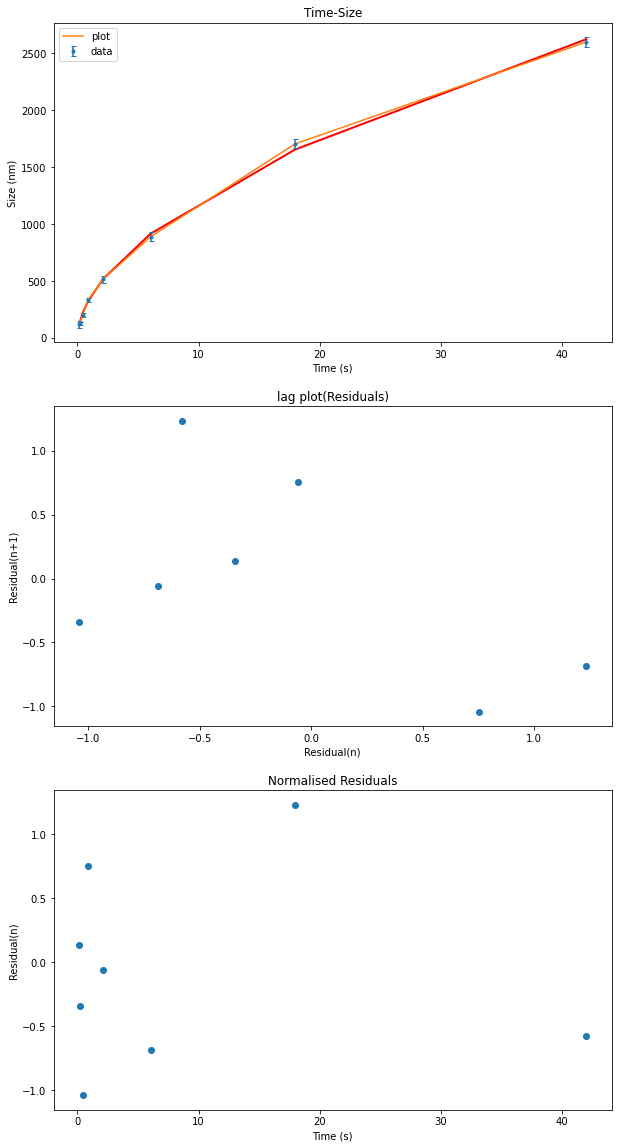

In [41]:
def four_i():
    '''using the chisqfunc from the previous cell, perform a chi-square minimisation and return the
    best fit parameters and chi-square minimum.
    Please make sure that the answer is a list/array of three floats'''
    initial_guess = [330,1] #initial guess
    popt, pcov = curve_fit(func, time, size, p0=initial_guess, sigma=size_errors) #Using curve fit function
    best_fit_r0=popt[0] #get parameters
    best_fit_n=popt[1]
    covariance_matrix=pcov
    x=[size, best_fit_r0, best_fit_n]
    min_chisq=sum((size-best_fit_r0*time**best_fit_n)**2/size_errors**2) #definition of Chi-sqare

    return best_fit_r0, best_fit_n, min_chisq

print(four_i())

fig, ax = plt.subplots(3, 1, figsize=(10,20))
Resi=(size-func(time,four_i()[0],four_i()[1]))/size_errors#Residuals
Resi1=list(Resi)
Resi2=list(Resi)
Resi1.remove(Resi1[0])
Resi2.remove(Resi2[len(Resi)-1])

ax[0].plot(time,func(time,four_i()[0],four_i()[1]), color='red', linewidth=2)#Plotting
ax[1].scatter(Resi1, Resi2)#Lagged plot
ax[2].scatter(time, Resi)#Normalised residuals
ax[0].errorbar(time, size, label = 'data', yerr=size_errors,fmt='.',capsize=2.5)
ax[0].plot(time, size, label = 'plot')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Size (nm)')
ax[1].set_xlabel('Residual(n)')
ax[1].set_ylabel('Residual(n+1)')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Residual(n)')
ax[0].set_title('Time-Size')
ax[1].set_title('lag plot(Residuals)')
ax[2].set_title('Normalised Residuals')
ax[0].legend()
plt.show()

In [42]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) What are  the  best-fit parameters?

In [43]:
def four_ii(): 
    '''Your function must return the best fit r0 and exponent n from the function four_i.
    Please make sure that the answer is a list/array of two floats'''
    r0=four_i()[0] #best fit parameters
    n=four_i()[1]
    return r0, n

print(four_ii())

(344.8044726181549, 0.5428280061865257)


In [44]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (iii) What is the reduced $\chi^2$ value? How many degrees of freedom are there?

In [45]:
def four_iii():
    '''your function should return the reduced chi-square as well as the number of degrees of freedom.
    Please make sure that the answer is a list/array of two floats'''
    df=len(size)-2
    red_chisq=four_i()[2]/df #Definition of degree of freedom
    return red_chisq, df

print(four_iii())

(0.6861333347769943, 6)


In [46]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [47]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (vi) Does the model give a good description of the data? (Hint: think about what other tests you could perform to test the null hypothesis)

This model gave us a good description. Because
1. Lag plot of normalised Residual keep in -2<x<2
2. Time-Residual graph does not make any shapes
3. Reduced Chi-square is close to 1. If the value is too low or too high,  should have a question.
4. Probability of Chi-square should be close to 0.5, But the probability is lower than 10$^{-4}$ should reject, and other values should check uncertainties and measurements of errors.
5. Durbin-Watson value autocorrelation of normalised residuals yields test that whether D is close to 2